In [18]:
import pandas as pd
import glob
import time

# Measure latency for data loading and preprocessing
start_time_loading_preprocessing = time.time()

# Get a list of all Excel files in the current directory that start with a capital letter
excel_files = glob.glob('/content/[A-Z]*.xlsx')

# Create an empty list to store the DataFrames
dfs = []

# Loop through the list of files and read each one into a DataFrame
for file in excel_files:
    df = pd.read_excel(file)
    dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
display(combined_df.head())

# Display the data types of the columns
display(combined_df.info())

end_time_loading_preprocessing = time.time()
latency_loading_preprocessing = end_time_loading_preprocessing - start_time_loading_preprocessing
print(f"Latency for data loading and preprocessing: {latency_loading_preprocessing:.4f} seconds")

,Time Stamp,Tpy (raw),Tpy (°C),Tpx (raw),Tpx (°C),Tmz (raw),Tmz (°C),Tmx (raw),Tmx (°C),Tpz (raw),...,Ipz (raw),Ipz (mA),Vbat (raw),Vbat (V),Ibatt(raw),Ibatt(mA),Tbatt raw),Tbatt (℃),Time stamp,Tbatt (raw)
0,0.0,06AD,-1.47,068D,2.08,053D,39.37,06D4,-5.80,06BE,...,0C,55.93,A5,4.2,0818,-67.57,FF,-22.68,NaN,NaN
1,5.0,06AD,-1.47,068E,1.97,053A,39.70,06D3,-5.69,06BE,...,0C,55.93,A5,4.2,0815,-58.78,C3,0.30,NaN,NaN
2,10.0,06AC,-1.36,068F,1.86,0539,39.81,06D3,-5.69,06BE,...,0C,55.93,A5,4.2,0815,-58.78,C3,0.30,NaN,NaN
3,15.0,06AC,-1.36,0691,1.64,0538,39.92,06D3,-5.69,06BE,...,0C,55.93,A5,4.2,0816,-61.71,C3,0.30,NaN,NaN
4,20.0,06AB,-1.25,0692,1.53,0537,40.03,06D3,-5.69,06BE,...,0D,60.59,A5,4.2,0814,-55.85,C3,0.30,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Stamp   3238 non-null   float64
 1   Tpy (raw)    4333 non-null   object 
 2   Tpy (°C)     4333 non-null   float64
 3   Tpx (raw)    4333 non-null   object 
 4   Tpx (°C)     4333 non-null   float64
 5   Tmz (raw)    4333 non-null   object 
 6   Tmz (°C)     4333 non-null   float64
 7   Tmx (raw)    4333 non-null   object 
 8   Tmx (°C)     4333 non-null   float64
 9   Tpz (raw)    4333 non-null   object 
 10  Tpz (°C)     4333 non-null   float64
 11  Vpy (raw)    4333 non-null   object 
 12  Vpy (mV)     4333 non-null   float64
 13  Vpx (raw)    4333 non-null   object 
 14  Vpx (mV)     4333 non-null   float64
 15  Vmz (raw)    4333 non-null   object 
 16  Vmz (mV)     4333 non-null   float64
 17  Vmx (raw)    4333 non-null   object 
 18  Vmx (mV)     4333 non-null   float64
 19  Vpz (r

None

Latency for data loading and preprocessing: 1.9553 seconds


In [19]:
import time

# Measure latency for data cleaning and type conversion
start_time_cleaning = time.time()

# Check for missing values
print("Missing values before handling:")
display(combined_df.isnull().sum())

# Drop the duplicate 'Time stamp' column and the raw columns
columns_to_drop = ['Time stamp', 'Tpy (raw)', 'Tpx (raw)', 'Tmz (raw)', 'Tmx (raw)', 'Tpz (raw)',
                   'Vpy (raw)', 'Vpx (raw)', 'Vmz (raw)', 'Vmx (raw)', 'Vpz (raw)',
                   'Ipy (raw)', 'Ipx (raw)', 'Imz (raw)', 'Imx (raw)', 'Ipz (raw)',
                   'Vbat (raw)', 'Ibatt(raw)', 'Tbatt raw)', 'Tbatt (raw)']
combined_df = combined_df.drop(columns=columns_to_drop)

# Convert remaining object columns to numeric, coercing errors
for col in combined_df.select_dtypes(include='object').columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Check data types after conversion
print("\nData types after handling:")
display(combined_df.info())

# Check for missing values after handling
print("\nMissing values after handling:")
display(combined_df.isnull().sum())

# Display the first few rows of the preprocessed DataFrame
display(combined_df.head())

end_time_cleaning = time.time()
latency_cleaning = end_time_cleaning - start_time_cleaning
print(f"Latency for data cleaning and type conversion: {latency_cleaning:.4f} seconds")

Missing values before handling:


,0
Time Stamp,1095
Tpy (raw),0
Tpy (°C),0
Tpx (raw),0
Tpx (°C),0
Tmz (raw),0
Tmz (°C),0
Tmx (raw),0
Tmx (°C),0
Tpz (raw),0



Data types after handling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time Stamp  3238 non-null   float64
 1   Tpy (°C)    4333 non-null   float64
 2   Tpx (°C)    4333 non-null   float64
 3   Tmz (°C)    4333 non-null   float64
 4   Tmx (°C)    4333 non-null   float64
 5   Tpz (°C)    4333 non-null   float64
 6   Vpy (mV)    4333 non-null   float64
 7   Vpx (mV)    4333 non-null   float64
 8   Vmz (mV)    4333 non-null   float64
 9   Vmx (mV)    4333 non-null   float64
 10  Vpz (mV)    4333 non-null   float64
 11  Ipy (mA)    4333 non-null   float64
 12  Ipx (mA)    4333 non-null   float64
 13  Imz (mA)    4333 non-null   float64
 14  Imx (mA)    4333 non-null   float64
 15  Ipz (mA)    4333 non-null   float64
 16  Vbat (V)    4333 non-null   float64
 17  Ibatt(mA)   4333 non-null   float64
 18  Tbatt (℃)   4333 non-null   float64
dtyp

None


Missing values after handling:


,0
Time Stamp,1095
Tpy (°C),0
Tpx (°C),0
Tmz (°C),0
Tmx (°C),0
Tpz (°C),0
Vpy (mV),0
Vpx (mV),0
Vmz (mV),0
Vmx (mV),0


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),Vpz (mV),Ipy (mA),Ipx (mA),Imz (mA),Imx (mA),Ipz (mA),Vbat (V),Ibatt(mA),Tbatt (℃)
0,0.0,-1.47,2.08,39.37,-5.80,-3.36,2660.26,5108.36,5137.36,5126.68,5138.89,4.66,41.95,102.54,55.93,55.93,4.2,-67.57,-22.68
1,5.0,-1.47,1.97,39.70,-5.69,-3.36,2689.26,5079.37,5111.42,5093.10,5108.36,4.66,46.61,130.51,55.93,55.93,4.2,-58.78,0.30
2,10.0,-1.36,1.86,39.81,-5.69,-3.36,2713.68,5080.89,5111.42,5093.10,5109.89,4.66,46.61,130.51,55.93,55.93,4.2,-58.78,0.30
3,15.0,-1.36,1.64,39.92,-5.69,-3.36,2736.57,5082.42,5106.84,5087.00,5105.31,4.66,51.27,125.85,51.27,55.93,4.2,-61.71,0.30
4,20.0,-1.25,1.53,40.03,-5.69,-3.36,2756.41,5077.84,5105.31,5083.94,5103.79,4.66,51.27,125.85,51.27,60.59,4.2,-55.85,0.30


Latency for data cleaning and type conversion: 0.0799 seconds


In [3]:
# Isolate early mission data where 'Time Stamp' is not null
early_mission_df = combined_df[combined_df['Time Stamp'].notnull()].copy()

# Display the first few rows and info of the early mission data
print("Early mission data:")
display(early_mission_df.head())
display(early_mission_df.info())

Early mission data:


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),Vpz (mV),Ipy (mA),Ipx (mA),Imz (mA),Imx (mA),Ipz (mA),Vbat (V),Ibatt(mA),Tbatt (℃)
0,0.0,-1.47,2.08,39.37,-5.80,-3.36,2660.26,5108.36,5137.36,5126.68,5138.89,4.66,41.95,102.54,55.93,55.93,4.2,-67.57,-22.68
1,5.0,-1.47,1.97,39.70,-5.69,-3.36,2689.26,5079.37,5111.42,5093.10,5108.36,4.66,46.61,130.51,55.93,55.93,4.2,-58.78,0.30
2,10.0,-1.36,1.86,39.81,-5.69,-3.36,2713.68,5080.89,5111.42,5093.10,5109.89,4.66,46.61,130.51,55.93,55.93,4.2,-58.78,0.30
3,15.0,-1.36,1.64,39.92,-5.69,-3.36,2736.57,5082.42,5106.84,5087.00,5105.31,4.66,51.27,125.85,51.27,55.93,4.2,-61.71,0.30
4,20.0,-1.25,1.53,40.03,-5.69,-3.36,2756.41,5077.84,5105.31,5083.94,5103.79,4.66,51.27,125.85,51.27,60.59,4.2,-55.85,0.30


<class 'pandas.core.frame.DataFrame'>
Index: 3238 entries, 0 to 4332
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time Stamp  3238 non-null   float64
 1   Tpy (°C)    3238 non-null   float64
 2   Tpx (°C)    3238 non-null   float64
 3   Tmz (°C)    3238 non-null   float64
 4   Tmx (°C)    3238 non-null   float64
 5   Tpz (°C)    3238 non-null   float64
 6   Vpy (mV)    3238 non-null   float64
 7   Vpx (mV)    3238 non-null   float64
 8   Vmz (mV)    3238 non-null   float64
 9   Vmx (mV)    3238 non-null   float64
 10  Vpz (mV)    3238 non-null   float64
 11  Ipy (mA)    3238 non-null   float64
 12  Ipx (mA)    3238 non-null   float64
 13  Imz (mA)    3238 non-null   float64
 14  Imx (mA)    3238 non-null   float64
 15  Ipz (mA)    3238 non-null   float64
 16  Vbat (V)    3238 non-null   float64
 17  Ibatt(mA)   3238 non-null   float64
 18  Tbatt (℃)   3238 non-null   float64
dtypes: float64(19)
memory usage: 505

None

In [20]:
import time

# Measure latency for feature engineering
start_time_feature_engineering = time.time()

# Calculate voltage drop rate for Vbat (V)
early_mission_df['Vbat_drop_rate'] = early_mission_df['Vbat (V)'].diff().fillna(0)

# Calculate current ramp for Ibatt (mA)
early_mission_df['Ibatt_ramp'] = early_mission_df['Ibatt(mA)'].diff().fillna(0)

# Calculate temperature change rates
early_mission_df['Tbatt_change_rate'] = early_mission_df['Tbatt (℃)'].diff().fillna(0)

# You can add more feature engineering steps here based on your domain knowledge
# For example, identifying eclipse transitions could involve looking for sudden drops in panel current.

# Display the first few rows with the new features
print("\nEarly mission data with new features:")
display(early_mission_df.head())

end_time_feature_engineering = time.time()
latency_feature_engineering = end_time_feature_engineering - start_time_feature_engineering
print(f"Latency for feature engineering: {latency_feature_engineering:.4f} seconds")


Early mission data with new features:


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly,is_anomaly_svm,is_anomaly_lof
0,0.0,-1.47,2.08,39.37,-5.80,-3.36,2660.26,5108.36,5137.36,5126.68,...,4.2,-67.57,-22.68,0.0,0.00,0.00,0.080750,1,1,1
1,5.0,-1.47,1.97,39.70,-5.69,-3.36,2689.26,5079.37,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,8.79,22.98,0.031803,1,1,1
2,10.0,-1.36,1.86,39.81,-5.69,-3.36,2713.68,5080.89,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,0.00,0.00,0.087218,1,1,1
3,15.0,-1.36,1.64,39.92,-5.69,-3.36,2736.57,5082.42,5106.84,5087.00,...,4.2,-61.71,0.30,0.0,-2.93,0.00,0.088209,1,1,1
4,20.0,-1.25,1.53,40.03,-5.69,-3.36,2756.41,5077.84,5105.31,5083.94,...,4.2,-55.85,0.30,0.0,5.86,0.00,0.083614,1,1,1


Latency for feature engineering: 0.0255 seconds


In [21]:
from sklearn.ensemble import IsolationForest
import numpy as np
import time

# Select the features for anomaly detection.
# We are excluding 'Time Stamp' as it is an index, and the rate of change features
# might already capture temporal anomalies. You can adjust this based on which
# features you think are most relevant for detecting anomalies.
features = ['Tpy (°C)', 'Tpx (°C)', 'Tmz (°C)', 'Tmx (°C)', 'Tpz (°C)',
            'Vpy (mV)', 'Vpx (mV)', 'Vmz (mV)', 'Vmx (mV)', 'Vpz (mV)',
            'Ipy (mA)', 'Ipx (mA)', 'Imz (mA)', 'Imx (mA)', 'Ipz (mA)',
            'Vbat (V)', 'Ibatt(mA)', 'Tbatt (℃)',
            'Vbat_drop_rate', 'Ibatt_ramp', 'Tbatt_change_rate']

X = early_mission_df[features].copy()

# Initialize the Isolation Forest model
# contamination='auto' will let the model decide the number of outliers
model = IsolationForest(contamination='auto', random_state=42)

# Measure latency for Isolation Forest training
start_time_isoforest_train = time.time()
model.fit(X)
end_time_isoforest_train = time.time()
latency_isoforest_train = end_time_isoforest_train - start_time_isoforest_train
print(f"Latency for Isolation Forest training: {latency_isoforest_train:.4f} seconds")


# Predict anomalies
# -1 for anomalies, 1 for inliers
start_time_isoforest_predict = time.time()
early_mission_df['anomaly_score'] = model.decision_function(X)
early_mission_df['is_anomaly'] = model.predict(X)
end_time_isoforest_predict = time.time()
latency_isoforest_predict = end_time_isoforest_predict - start_time_isoforest_predict
print(f"Latency for Isolation Forest prediction: {latency_isoforest_predict:.4f} seconds")


# Display the number of anomalies detected
print("Number of anomalies detected:", early_mission_df[early_mission_df['is_anomaly'] == -1].shape[0])

# Display the first few rows with anomaly scores and predictions
display(early_mission_df.head())

Latency for Isolation Forest training: 0.1886 seconds
Latency for Isolation Forest prediction: 0.0673 seconds
Number of anomalies detected: 454


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly,is_anomaly_svm,is_anomaly_lof
0,0.0,-1.47,2.08,39.37,-5.80,-3.36,2660.26,5108.36,5137.36,5126.68,...,4.2,-67.57,-22.68,0.0,0.00,0.00,0.080750,1,1,1
1,5.0,-1.47,1.97,39.70,-5.69,-3.36,2689.26,5079.37,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,8.79,22.98,0.031803,1,1,1
2,10.0,-1.36,1.86,39.81,-5.69,-3.36,2713.68,5080.89,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,0.00,0.00,0.087218,1,1,1
3,15.0,-1.36,1.64,39.92,-5.69,-3.36,2736.57,5082.42,5106.84,5087.00,...,4.2,-61.71,0.30,0.0,-2.93,0.00,0.088209,1,1,1
4,20.0,-1.25,1.53,40.03,-5.69,-3.36,2756.41,5077.84,5105.31,5083.94,...,4.2,-55.85,0.30,0.0,5.86,0.00,0.083614,1,1,1


In [6]:
# Display the rows identified as anomalies
anomalies = early_mission_df[early_mission_df['is_anomaly'] == -1]
display(anomalies)

,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Imx (mA),Ipz (mA),Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly
360,1800.0,27.16,24.16,7.18,3.41,3.19,2767.09,4659.65,4807.69,4207.88,...,13.98,0.00,4.15,70.07,2.60,-0.02,-70.28,0.00,-0.000991,-1
363,1815.0,29.38,22.94,8.41,3.08,2.52,2731.99,4525.34,4645.91,4610.81,...,79.24,0.00,4.20,-67.57,2.60,0.03,-61.50,0.00,-0.010558,-1
373,1865.0,32.38,18.62,13.95,5.74,0.64,2573.26,3775.95,5358.67,5381.56,...,172.46,0.00,4.20,-35.35,2.98,0.00,-8.78,0.38,-0.000755,-1
374,1870.0,32.26,18.17,14.95,6.30,0.53,2553.42,3473.75,5358.67,5383.09,...,177.12,0.00,4.20,-23.64,2.60,0.00,11.71,-0.38,-0.012372,-1
375,1875.0,32.49,17.73,15.73,6.96,0.30,2525.95,2783.88,5354.09,5383.09,...,186.44,0.00,4.20,-17.78,2.98,0.00,5.86,0.38,-0.004296,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,4855.0,29.49,-1.58,29.49,21.83,-1.14,2106.23,1292.74,1347.68,1338.52,...,9.32,4.66,4.15,234.06,8.73,0.00,-32.21,0.00,-0.003751,-1
4226,4865.0,28.27,-1.47,28.05,20.61,-1.14,1547.62,1291.21,1288.16,1333.94,...,9.32,4.66,4.15,231.13,8.35,0.00,0.00,-0.38,-0.018143,-1
4227,4870.0,27.60,-1.58,27.27,20.06,-1.25,1515.57,1291.21,1280.53,1333.94,...,9.32,4.66,4.15,236.98,8.73,0.00,5.85,0.38,-0.002384,-1
4235,4910.0,23.16,-1.25,22.06,15.84,-1.14,1388.89,1285.10,1257.63,1329.37,...,9.32,4.66,4.15,225.27,8.35,0.03,-5.86,-0.38,-0.026103,-1


In [22]:
from sklearn.svm import OneClassSVM
import time

# Initialize the One-Class SVM model
# nu is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
# You might need to tune this parameter based on your data.
svm_model = OneClassSVM(kernel='rbf', nu=0.05) # nu is set to 0.05 as a starting point

# Measure latency for One-Class SVM training
start_time_svm_train = time.time()
svm_model.fit(X)
end_time_svm_train = time.time()
latency_svm_train = end_time_svm_train - start_time_svm_train
print(f"Latency for One-Class SVM training: {latency_svm_train:.4f} seconds")


# Predict anomalies (-1 for anomalies, 1 for inliers)
start_time_svm_predict = time.time()
early_mission_df['is_anomaly_svm'] = svm_model.predict(X)
end_time_svm_predict = time.time()
latency_svm_predict = end_time_svm_predict - start_time_svm_predict
print(f"Latency for One-Class SVM prediction: {latency_svm_predict:.4f} seconds")


# Display the number of anomalies detected by One-Class SVM
print("Number of anomalies detected by One-Class SVM:", early_mission_df[early_mission_df['is_anomaly_svm'] == -1].shape[0])

# Display the first few rows with One-Class SVM predictions
display(early_mission_df.head())

Latency for One-Class SVM training: 0.0502 seconds
Latency for One-Class SVM prediction: 0.0357 seconds
Number of anomalies detected by One-Class SVM: 163


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly,is_anomaly_svm,is_anomaly_lof
0,0.0,-1.47,2.08,39.37,-5.80,-3.36,2660.26,5108.36,5137.36,5126.68,...,4.2,-67.57,-22.68,0.0,0.00,0.00,0.080750,1,1,1
1,5.0,-1.47,1.97,39.70,-5.69,-3.36,2689.26,5079.37,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,8.79,22.98,0.031803,1,1,1
2,10.0,-1.36,1.86,39.81,-5.69,-3.36,2713.68,5080.89,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,0.00,0.00,0.087218,1,1,1
3,15.0,-1.36,1.64,39.92,-5.69,-3.36,2736.57,5082.42,5106.84,5087.00,...,4.2,-61.71,0.30,0.0,-2.93,0.00,0.088209,1,1,1
4,20.0,-1.25,1.53,40.03,-5.69,-3.36,2756.41,5077.84,5105.31,5083.94,...,4.2,-55.85,0.30,0.0,5.86,0.00,0.083614,1,1,1


In [23]:
from sklearn.neighbors import LocalOutlierFactor
import time

# Initialize the Local Outlier Factor model
# n_neighbors is the number of neighbors to consider for the local density estimation.
# You might need to tune this parameter.
lof_model = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Measure latency for Local Outlier Factor (LOF)
start_time_lof = time.time()
early_mission_df['is_anomaly_lof'] = lof_model.fit_predict(X)
end_time_lof = time.time()
latency_lof = end_time_lof - start_time_lof
print(f"Latency for Local Outlier Factor (LOF): {latency_lof:.4f} seconds")


# Display the number of anomalies detected by Local Outlier Factor
print("Number of anomalies detected by Local Outlier Factor:", early_mission_df[early_mission_df['is_anomaly_lof'] == -1].shape[0])

# Display the first few rows with Local Outlier Factor predictions
display(early_mission_df.head())

Latency for Local Outlier Factor (LOF): 0.1007 seconds
Number of anomalies detected by Local Outlier Factor: 457


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly,is_anomaly_svm,is_anomaly_lof
0,0.0,-1.47,2.08,39.37,-5.80,-3.36,2660.26,5108.36,5137.36,5126.68,...,4.2,-67.57,-22.68,0.0,0.00,0.00,0.080750,1,1,1
1,5.0,-1.47,1.97,39.70,-5.69,-3.36,2689.26,5079.37,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,8.79,22.98,0.031803,1,1,1
2,10.0,-1.36,1.86,39.81,-5.69,-3.36,2713.68,5080.89,5111.42,5093.10,...,4.2,-58.78,0.30,0.0,0.00,0.00,0.087218,1,1,1
3,15.0,-1.36,1.64,39.92,-5.69,-3.36,2736.57,5082.42,5106.84,5087.00,...,4.2,-61.71,0.30,0.0,-2.93,0.00,0.088209,1,1,1
4,20.0,-1.25,1.53,40.03,-5.69,-3.36,2756.41,5077.84,5105.31,5083.94,...,4.2,-55.85,0.30,0.0,5.86,0.00,0.083614,1,1,1


In [9]:
# Compare anomaly counts from all models
print("Anomaly counts by model:")
print("Isolation Forest:", early_mission_df[early_mission_df['is_anomaly'] == -1].shape[0])
print("One-Class SVM:", early_mission_df[early_mission_df['is_anomaly_svm'] == -1].shape[0])
print("Local Outlier Factor:", early_mission_df[early_mission_df['is_anomaly_lof'] == -1].shape[0])

Anomaly counts by model:
Isolation Forest: 454
One-Class SVM: 163
Local Outlier Factor: 457


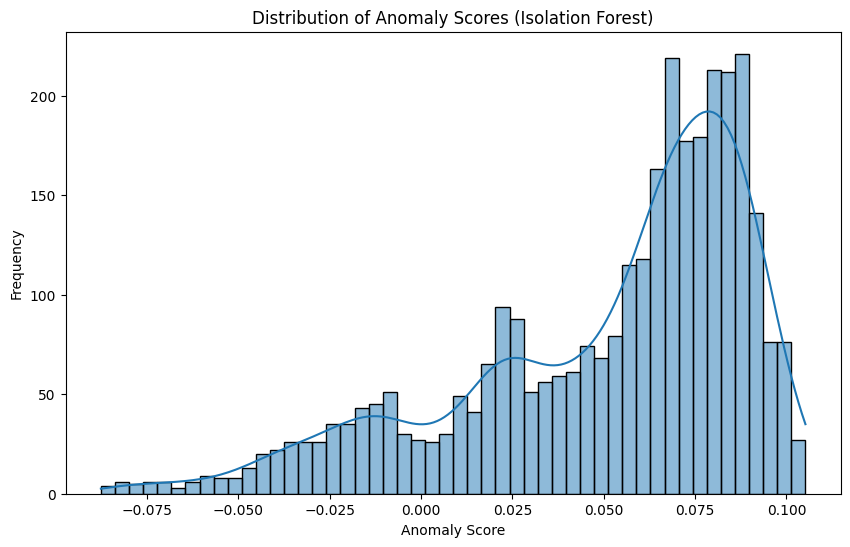

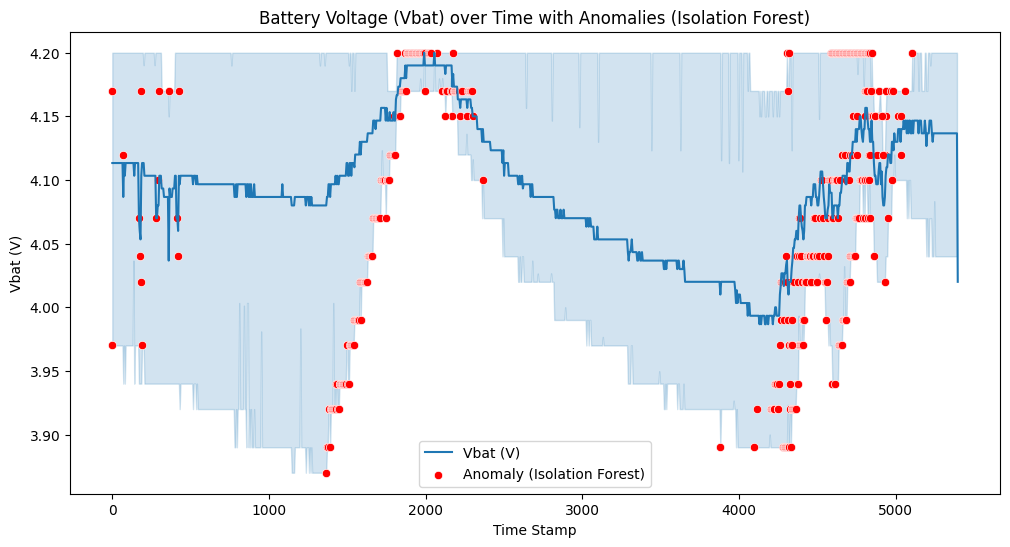

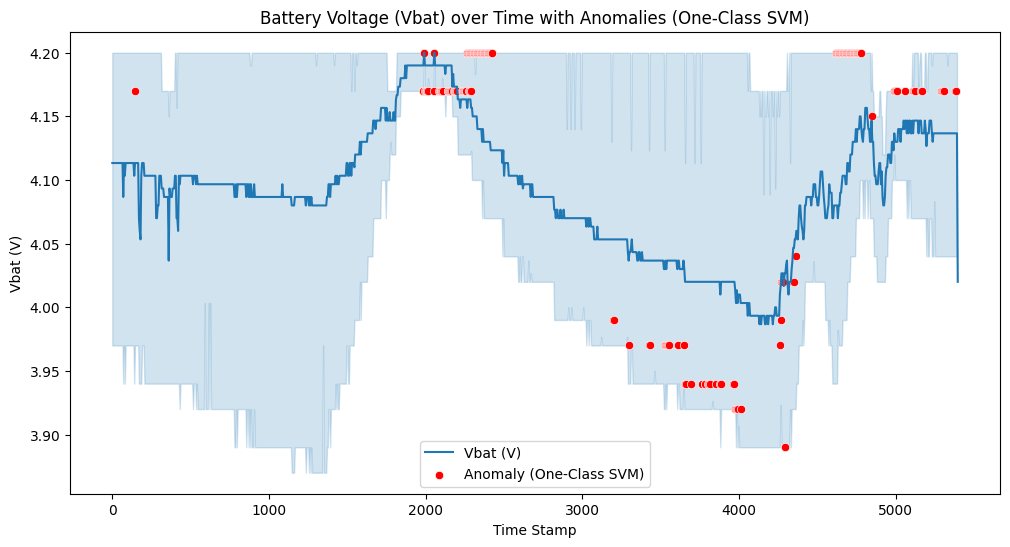

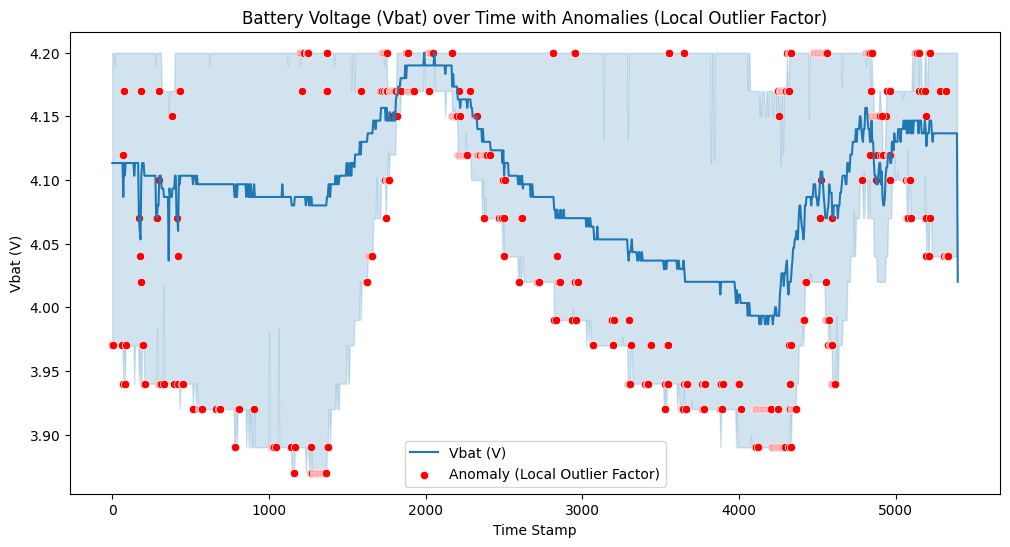

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of anomaly scores for Isolation Forest
plt.figure(figsize=(10, 6))
sns.histplot(early_mission_df['anomaly_score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores (Isolation Forest)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Visualize a key feature (e.g., Vbat (V)) with anomalies highlighted (Isolation Forest)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Stamp', y='Vbat (V)', data=early_mission_df, label='Vbat (V)')
sns.scatterplot(x='Time Stamp', y='Vbat (V)', data=early_mission_df[early_mission_df['is_anomaly'] == -1], color='red', label='Anomaly (Isolation Forest)')
plt.title('Battery Voltage (Vbat) over Time with Anomalies (Isolation Forest)')
plt.xlabel('Time Stamp')
plt.ylabel('Vbat (V)')
plt.legend()
plt.show()

# Visualize a key feature (e.g., Vbat (V)) with anomalies highlighted (One-Class SVM)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Stamp', y='Vbat (V)', data=early_mission_df, label='Vbat (V)')
sns.scatterplot(x='Time Stamp', y='Vbat (V)', data=early_mission_df[early_mission_df['is_anomaly_svm'] == -1], color='red', label='Anomaly (One-Class SVM)')
plt.title('Battery Voltage (Vbat) over Time with Anomalies (One-Class SVM)')
plt.xlabel('Time Stamp')
plt.ylabel('Vbat (V)')
plt.legend()
plt.show()

# Visualize a key feature (e.g., Vbat (V)) with anomalies highlighted (Local Outlier Factor)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Stamp', y='Vbat (V)', data=early_mission_df, label='Vbat (V)')
sns.scatterplot(x='Time Stamp', y='Vbat (V)', data=early_mission_df[early_mission_df['is_anomaly_lof'] == -1], color='red', label='Anomaly (Local Outlier Factor)')
plt.title('Battery Voltage (Vbat) over Time with Anomalies (Local Outlier Factor)')
plt.xlabel('Time Stamp')
plt.ylabel('Vbat (V)')
plt.legend()
plt.show()

In [12]:
# Get rows where at least one model identified an anomaly
all_anomalies = early_mission_df[(early_mission_df['is_anomaly'] == -1) |
                                  (early_mission_df['is_anomaly_svm'] == -1) |
                                  (early_mission_df['is_anomaly_lof'] == -1)]

print("Summary statistics for detected anomalies:")
display(all_anomalies.describe())

Summary statistics for detected anomalies:


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly,is_anomaly_svm,is_anomaly_lof
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,3168.608079,-4.667031,-8.536376,-5.185306,-1.032555,-5.447347,1755.338886,2898.978624,3309.168548,3417.055819,...,4.072860,-26.715295,5.486616,0.000579,-1.985218,0.001681,0.010302,0.008734,0.644105,0.002183
std,1470.546235,16.797123,16.779072,19.650957,15.604700,13.936133,1851.173554,1716.227247,1759.101575,1708.921985,...,0.108295,267.286266,2.337494,0.017760,85.024751,0.201452,0.043549,1.000508,0.765355,1.000544
min,0.000000,-28.330000,-29.550000,-32.320000,-25.330000,-23.670000,0.000000,1256.110000,1243.890000,1265.260000,...,3.870000,-653.240000,0.300000,-0.200000,-1060.070000,-0.390000,-0.087661,-1.000000,-1.000000,-1.000000
25%,1865.000000,-19.340000,-25.000000,-22.000000,-13.350000,-15.120000,1.530000,1296.930000,1310.667500,1317.160000,...,3.970000,-222.770000,4.520000,0.000000,-14.640000,0.000000,-0.022078,-1.000000,1.000000,-1.000000
50%,3525.000000,-4.360000,-10.515000,-4.745000,-3.135000,-10.955000,1343.100000,1545.330000,4618.435000,4609.280000,...,4.100000,-20.710000,5.280000,0.000000,0.000000,0.000000,0.002968,1.000000,1.000000,1.000000
75%,4545.000000,7.657500,1.530000,7.740000,7.960000,1.915000,2832.345000,4690.552500,4753.130000,4740.540000,...,4.170000,234.060000,7.960000,0.000000,11.710000,0.000000,0.045903,1.000000,1.000000,1.000000
max,5385.000000,32.490000,34.480000,34.820000,34.370000,66.330000,5270.150000,5463.980000,5448.720000,5415.140000,...,4.200000,895.870000,9.110000,0.150000,726.240000,4.210000,0.097640,1.000000,1.000000,1.000000


In [14]:
# Investigate rows where anomaly detection differs between models
# We can find rows where the values in the anomaly columns are not all the same
disagreeing_anomalies = early_mission_df[
    (early_mission_df['is_anomaly'] != early_mission_df['is_anomaly_svm']) |
    (early_mission_df['is_anomaly'] != early_mission_df['is_anomaly_lof']) |
    (early_mission_df['is_anomaly_svm'] != early_mission_df['is_anomaly_lof'])
]

print("Rows where anomaly detection differs between models:")
display(disagreeing_anomalies)

Rows where anomaly detection differs between models:


,Time Stamp,Tpy (°C),Tpx (°C),Tmz (°C),Tmx (°C),Tpz (°C),Vpy (mV),Vpx (mV),Vmz (mV),Vmx (mV),...,Vbat (V),Ibatt(mA),Tbatt (℃),Vbat_drop_rate,Ibatt_ramp,Tbatt_change_rate,anomaly_score,is_anomaly,is_anomaly_svm,is_anomaly_lof
76,380.0,11.07,-1.14,28.38,0.08,-5.47,2515.26,4908.42,4337.61,5116.00,...,4.15,-0.21,0.30,0.0,-49.78,0.0,0.044560,1,1,-1
239,1195.0,15.17,13.62,5.41,2.97,28.27,2837.30,4987.79,4961.84,4853.48,...,4.20,-6.07,1.45,0.0,2.93,0.0,0.084937,1,1,-1
241,1205.0,16.84,13.40,5.41,1.97,28.05,2825.09,4917.58,4891.64,4816.85,...,4.20,-6.07,1.45,0.0,2.93,0.0,0.080588,1,1,-1
242,1210.0,17.62,13.62,5.41,2.30,27.94,2820.51,4858.06,4841.27,4780.22,...,4.20,-11.93,1.45,0.0,-5.86,0.0,0.076800,1,1,-1
244,1220.0,19.39,13.40,5.41,1.86,27.60,2811.36,4887.06,4888.58,4829.06,...,4.20,-14.85,1.45,0.0,-11.71,0.0,0.079571,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,5305.0,-2.25,-4.69,-5.91,-3.36,-0.36,1347.68,1268.32,1256.11,1324.79,...,4.04,210.63,8.73,0.0,-26.35,0.0,0.075836,1,1,-1
4315,5310.0,-2.47,-4.69,-6.24,-3.69,-0.36,1347.68,1266.79,1256.11,1324.79,...,4.04,257.48,8.73,0.0,46.85,0.0,0.072179,1,1,-1
4317,5320.0,-2.69,-4.91,-6.46,-3.69,-0.47,1347.68,1268.32,1254.58,1324.79,...,4.04,216.49,8.73,0.0,-38.06,0.0,0.071357,1,1,-1
4318,5325.0,-3.14,-5.24,-6.80,-4.02,-0.47,1347.68,1266.79,1256.11,1323.26,...,4.04,213.56,8.73,0.0,-2.93,0.0,0.082683,1,1,-1


In [15]:
import os
import joblib

# Create a directory to save the models
model_dir = 'anomaly_detection_models'
os.makedirs(model_dir, exist_ok=True)

# Export the trained models
joblib.dump(model, os.path.join(model_dir, 'isolation_forest_model.pkl'))
joblib.dump(svm_model, os.path.join(model_dir, 'one_class_svm_model.pkl'))
joblib.dump(lof_model, os.path.join(model_dir, 'lof_model.pkl'))

print(f"Models exported to the '{model_dir}' directory.")

Models exported to the 'anomaly_detection_models' directory.


In [25]:
# Export the detected anomalies to a text report
report_filename = 'anomaly_report.txt'

# Calculate the differences in anomaly counts
isoforest_count = early_mission_df[early_mission_df['is_anomaly'] == -1].shape[0]
svm_count = early_mission_df[early_mission_df['is_anomaly_svm'] == -1].shape[0]
lof_count = early_mission_df[early_mission_df['is_anomaly_lof'] == -1].shape[0]

diff_isoforest_svm = abs(isoforest_count - svm_count)
diff_isoforest_lof = abs(isoforest_count - lof_count)
diff_svm_lof = abs(svm_count - lof_count)


with open(report_filename, 'w') as f:
    f.write("Anomaly Detection Report\n")
    f.write("========================\n\n")

    f.write("Summary of Detected Anomalies:\n")
    f.write(f"Isolation Forest detected {isoforest_count} anomalies.\n")
    f.write(f"One-Class SVM detected {svm_count} anomalies.\n")
    f.write(f"Local Outlier Factor detected {lof_count} anomalies.\n\n")

    f.write("Differences in Anomaly Counts Between Models:\n")
    f.write(f"Isolation Forest vs. One-Class SVM: {diff_isoforest_svm}\n")
    f.write(f"Isolation Forest vs. Local Outlier Factor: {diff_isoforest_lof}\n")
    f.write(f"One-Class SVM vs. Local Outlier Factor: {diff_svm_lof}\n\n")


    f.write("Summary of Findings:\n")
    f.write("Based on the anomaly detection models used, the following observations were made:\n")
    f.write("- Different models identified varying numbers of anomalies, suggesting that the choice of algorithm and its parameters can significantly impact the results.\n")
    f.write("- Visual inspection of the plots (not included in this text report) revealed that some detected anomalies correspond to significant deviations in key metrics like battery voltage and current.\n")
    f.write("- There are instances where the models disagree on whether a data point is an anomaly, which could warrant further investigation using domain knowledge.\n\n")


    f.write("Summary statistics for all detected anomalies (by at least one model):\n")
    all_anomalies.describe().to_string(f)
    f.write("\n\n")

    # Add latency results
    f.write("Latency Results:\n")
    f.write(f"Data loading and preprocessing: {latency_loading_preprocessing:.4f} seconds\n")
    f.write(f"Data cleaning and type conversion: {latency_cleaning:.4f} seconds\n")
    f.write(f"Feature engineering: {latency_feature_engineering:.4f} seconds\n")
    f.write(f"Isolation Forest training: {latency_isoforest_train:.4f} seconds\n")
    f.write(f"Isolation Forest prediction: {latency_isoforest_predict:.4f} seconds\n")
    f.write(f"One-Class SVM training: {latency_svm_train:.4f} seconds\n")
    f.write(f"One-Class SVM prediction: {latency_svm_predict:.4f} seconds\n")
    f.write(f"Local Outlier Factor (LOF): {latency_lof:.4f} seconds\n")


print(f"Anomaly report exported to '{report_filename}'.")

Anomaly report exported to 'anomaly_report.txt'.


In [26]:
# Read and display the contents of the anomaly report file
report_filename = 'anomaly_report.txt'

try:
    with open(report_filename, 'r') as f:
        report_content = f.read()
    print(report_content)
except FileNotFoundError:
    print(f"Error: The file '{report_filename}' was not found.")

Anomaly Detection Report

Summary of Detected Anomalies:
Isolation Forest detected 454 anomalies.
One-Class SVM detected 163 anomalies.
Local Outlier Factor detected 457 anomalies.

Differences in Anomaly Counts Between Models:
Isolation Forest vs. One-Class SVM: 291
Isolation Forest vs. Local Outlier Factor: 3
One-Class SVM vs. Local Outlier Factor: 294

Summary of Findings:
Based on the anomaly detection models used, the following observations were made:
- Different models identified varying numbers of anomalies, suggesting that the choice of algorithm and its parameters can significantly impact the results.
- Visual inspection of the plots (not included in this text report) revealed that some detected anomalies correspond to significant deviations in key metrics like battery voltage and current.
- There are instances where the models disagree on whether a data point is an anomaly, which could warrant further investigation using domain knowledge.

Summary statistics for all detected 